In [8]:
#
#Fitting Dugoff on Pacejka52
#

import numpy as np
import matplotlib.pyplot as plt

import Dugoff as d
import Pacejka52 as pa52

Fz = 4000
Fz0 = 3114
IA = 0

i=1000
Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)

params_Fx_init = [30000, 12000, 0.8]
params_Fy_init = [30000, 12000, 0.8]

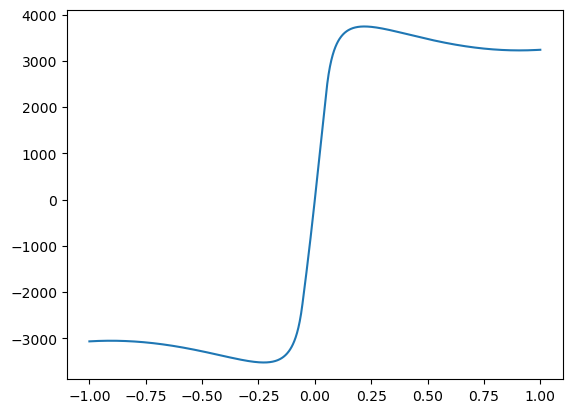

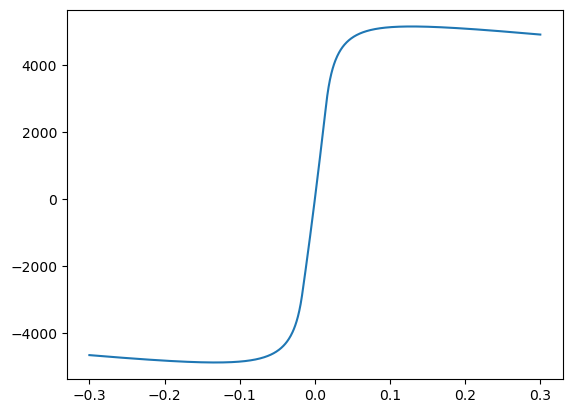

In [2]:
Fx_d = d.dugoff_long(Sx,Sy,Fz, *params_Fx_init)
Fy_d = d.dugoff_lat(Sx,Sy,Fz, *params_Fy_init)

plt.figure(1)
plt.plot(Sx,Fx_d)

plt.figure(2)
plt.plot(Sy,Fy_d)



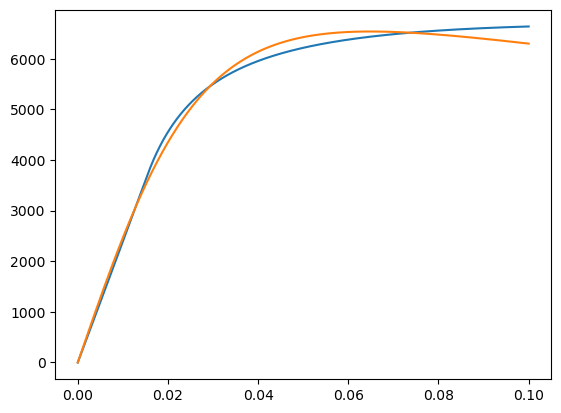

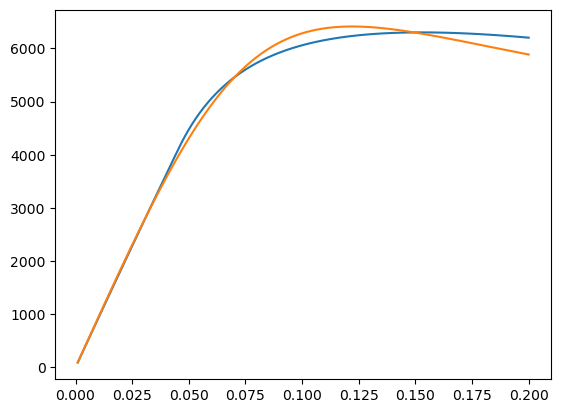

In [9]:
#Fitting
import scipy.optimize as opt
from scipy.optimize import curve_fit

import Pacejka52_Sv_Sh_0 as pa0
#Pacejka 52

Sx = np.linspace(0,0.1,1000)
Sy = np.linspace(0.001,0.2,1000)

params_Fx_init = [30000, 12000, 1.4] # Cs, Ca, mu
params_Fy_init = [30000, 12000, 1.4] # Cs, Ca, mu

Fx_pa = pa0.Pacejka52_long(Fz,Sx,IA,Fz0)[0]
Fy_pa = pa0.Pacejka52_lat(Fz,Sy,IA,Fz0)[0]


def Fx_d_func(Sx,Cs,Ca, mu):
    return d.dugoff_long(Sx,Sy,Fz,Cs,Ca,mu)

def Fy_d_func(Sy,Cs,Ca, mu):
    return d.dugoff_lat(Sx,Sy,Fz,Cs,Ca,mu)

Fx_d_params, _ = curve_fit(Fx_d_func, Sx, Fx_pa, params_Fx_init,maxfev = 8000)
Fy_d_params, _ = curve_fit(Fy_d_func, Sy, Fy_pa, params_Fy_init,maxfev = 8000)

Fx_d_fit = Fx_d_func(Sx,Fx_d_params[0],Fx_d_params[1],Fx_d_params[2])
Fy_d_fit = Fy_d_func(Sy,Fy_d_params[0],Fy_d_params[1],Fy_d_params[2])

plt.figure(1)
plt.plot(Sx,Fx_d_fit)
plt.plot(Sx,Fx_pa)

plt.figure(2)
plt.plot(Sy,Fy_d_fit)
plt.plot(Sy,Fy_pa)

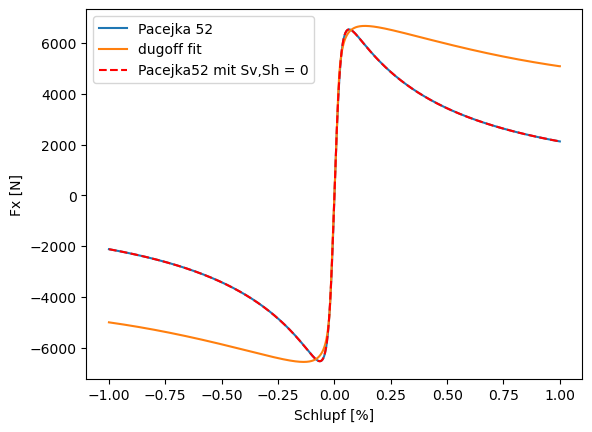

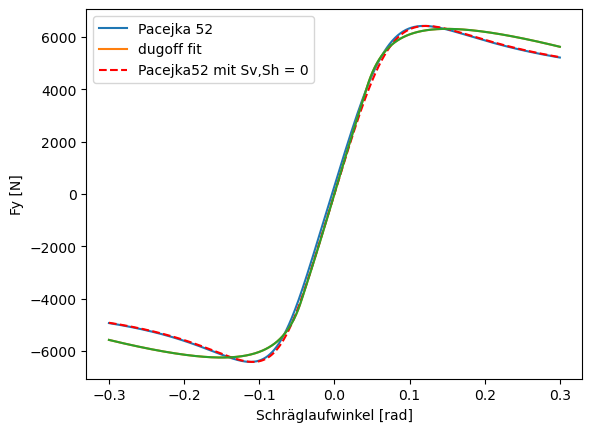

In [14]:
#plots
Syy = np.linspace(-0.3,0.3,1000)
Sxx = np.linspace(-1,1,1000)

Fxx_pa = pa52.Pacejka52_long(Fz,Sxx,IA,Fz0)[0]
Fyy_pa = pa52.Pacejka52_lat(Fz,Syy,IA,Fz0)[0]

Fxx_pa_0 = pa0.Pacejka52_long(Fz,Sxx,IA,Fz0)[0]
Fyy_pa_0 = pa0.Pacejka52_lat(Fz,Syy,IA,Fz0)[0]



Fx_d = Fx_d_func(Sxx,Fx_d_params[0],Fx_d_params[1],Fx_d_params[2])
Fy_d = Fy_d_func(Syy,Fy_d_params[0],Fy_d_params[1],Fy_d_params[2])
Fy_d1 = d.dugoff_lat(Sx,Syy,Fz,Fy_d_params[0],Fy_d_params[1],Fy_d_params[2])

plt.figure(1)
plt.plot(Sxx,Fxx_pa, label = "Pacejka 52")
plt.plot(Sxx,Fx_d, label = "dugoff fit")
plt.plot(Sxx,Fxx_pa_0, 'r--', label = "Pacejka52 mit Sv,Sh = 0")
plt.xlabel("Schlupf [%]")
plt.ylabel("Fx [N]")
plt.legend()

plt.figure(2)
plt.plot(Syy,Fyy_pa, label = "Pacejka 52")
plt.plot(Syy,Fy_d, label = "dugoff fit")
plt.plot(Syy,Fyy_pa_0,'r--', label = "Pacejka52 mit Sv,Sh = 0")
plt.xlabel("Schräglaufwinkel [rad]")
plt.ylabel("Fy [N]")
plt.legend()
plt.plot(Syy,Fy_d1)

In [7]:
print(Fx_d_params)
print(Fy_d_params)

[ 1.58443682e+05 -1.59200977e+00  1.24651131e+00]
[2.74289218e-01 6.16477615e+03 1.43548745e-01]


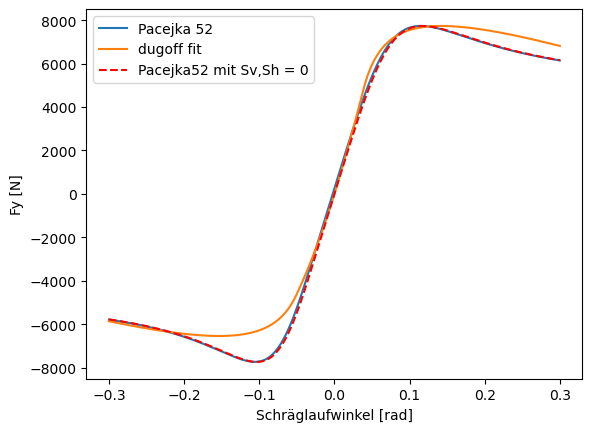

In [6]:
#plots
Fz = 5000

#plots
Syy = np.linspace(-0.3,0.3,1000)
Sxx = np.linspace(-1,1,1000)

Fxx_pa = pa52.Pacejka52_long(Fz,Sxx,IA,Fz0)[0]
Fyy_pa = pa52.Pacejka52_lat(Fz,Syy,IA,Fz0)[0]

Fxx_pa_0 = pa0.Pacejka52_long(Fz,Sxx,IA,Fz0)[0]
Fyy_pa_0 = pa0.Pacejka52_lat(Fz,Syy,IA,Fz0)[0]


Fy_params_1500 = [1.27681485e+00, 7.52703245e+03, 1.30255055e-01]

Fy_d =d.dugoff_lat(Sxx,Syy,Fz,*Fy_params_1500)



plt.figure(2)
plt.plot(Syy,Fyy_pa, label = "Pacejka 52")
plt.plot(Syy,Fy_d, label = "dugoff fit")
plt.plot(Syy,Fyy_pa_0,'r--', label = "Pacejka52 mit Sv,Sh = 0")
plt.xlabel("Schräglaufwinkel [rad]")
plt.ylabel("Fy [N]")
plt.legend()

